In [2]:
###IMPORT REQUIRED PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colormaps as cmaps

FIGURE 2: Sample GA results

In [5]:
###READ IN DATA
ode = pd.read_csv('F:/plots/sample_ga_ode_test.csv')
fba = pd.read_csv('F:/plots/sample_ga_fba_test.csv')

In [6]:
### SAMPLE CURVE STATISTICS
#Compute time to 90% of steady state
ss = fba.lam[len(fba)-1]
print(fba.loc[fba.lam < ss/0.9].index[0]/(60*60))
#Percent drop of lambda
100*(fba.lam[0] - fba.lam[len(fba)-1])/fba.lam[0]

0.0


4.9370195397654015

In [8]:
#Compute GA from ODE results
vm_miox = 0.2201 * 60 * 60 #[mM/s],
km_miox_mi = 24.7 #[mM],
a_miox = 5.4222 #[no units],
ka_miox_mi = 20 #[mM],
def michaelismenten_substrateactivation(x, vm, km, a, ka): return ((vm * (1+ (a*x)/(ka + x)))*x)/(km + x)
glucaric_acid = []
ga = 0
for t in range(len(ode)):
    dga = ode.miox[t] * michaelismenten_substrateactivation(ode.mi[t], vm_miox, km_miox_mi, a_miox, ka_miox_mi) - fba.lam[t]*ga
    ga = ga + dga
    glucaric_acid.append(ga)

In [14]:
np.sum(glucaric_acid)

477.4192668275776

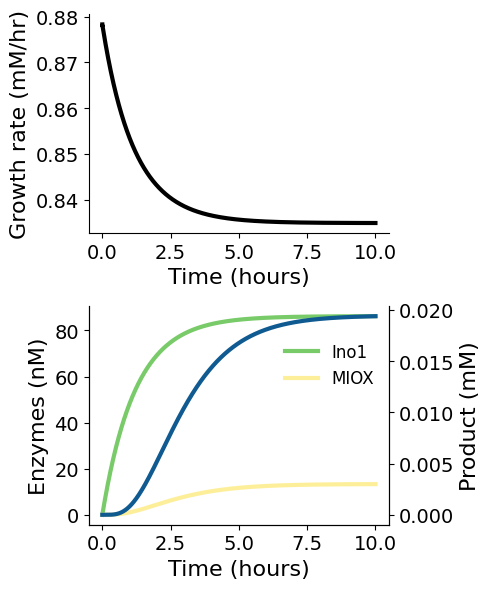

In [12]:
###FIGURE: Sample Bcar results
palette = cmaps.haline.discrete(5).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
fig, axs = plt.subplots(2, 1, figsize=(5, 6))
#Growth rate 
ax = axs[0]
ax.plot(fba.time, fba.lam, lw=linewidth, color="black")
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Growth rate (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top', 'right']:
    ax.spines[axis].set_linewidth(0)
    

#Enzymes
ax = axs[1]
sf = 1000 #scales from uM to nM
ax2 = ax.twinx()
ax2.plot(ode.time, glucaric_acid, lw=linewidth, color=palette[1], label=r'glucaric acid')
ax2.set_ylabel('Product (mM)', fontsize=axislabelsize)
ax2.tick_params(axis='y', labelsize=axistickssize)

ax.plot(ode.time, ode.ino1*sf, lw=linewidth, color=palette[3], label='Ino1')
ax.plot(ode.time, ode.miox*sf, lw=linewidth, color=palette[4], label='MIOX')
ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Enzymes (nM)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
ax.legend(fontsize=legendsize, loc='upper right', frameon=False, bbox_to_anchor=(1.0, 0.9))
for axis in ['top']:
    ax.spines[axis].set_linewidth(0)
    ax2.spines[axis].set_linewidth(0)

fig.tight_layout()
fig.savefig("../figs/ga_samplesim_metabolites.png", dpi=300)

FIGURE 3: Medium conditions

In [3]:
##READ IN DATA
# growth_conditions_names = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "na-glucosamine", "glycerol", "succinate", "acetate"]
# wt = pd.DataFrame()
# for g in growth_conditions_names:
#     ode_data = pd.read_csv("F:/medium_conditions/"+g+"_ode_data.csv")
#     fba_data = pd.read_csv("F:/medium_conditions/"+g+"_fba_data.csv")
#     wt = pd.concat([wt, pd.DataFrame({"gc": [g], "p_auc": [np.sum(ode_data.mi)], "p_final": [list(ode_data.mi)[-1]], "lam_final": [list(fba_data.lam)[-1]]})])  

#Alternatively, read in directly from CSV
wt = pd.read_csv('F:/plots/medium_cond_sum.csv')

In [4]:
sorted_wt = wt.sort_values(by='lam_final', ascending=False)
sorted_wt['unburdened_lam'] = [0.9487, 0.9487, 0.8837, 0.883, 0.798, 0.87857, 0.8679, 0.717, 0.689588, 0.495, 0.45, 0.380, 0.3785, 0.3139, 0.210]

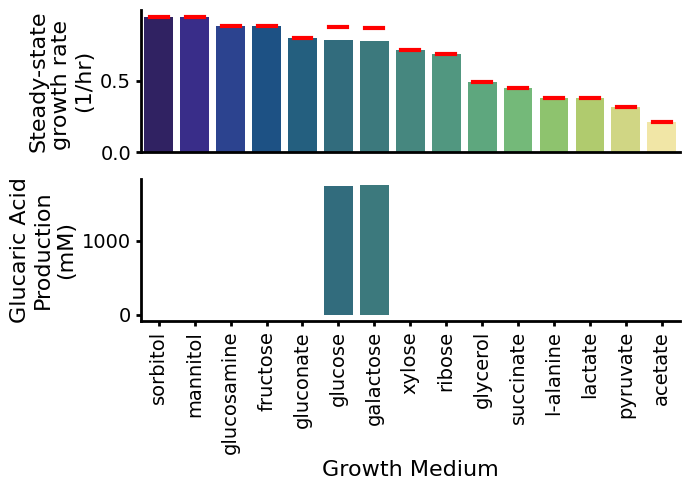

In [6]:
###FIGURE: Medium conditions growth rate and product production
###FIGURE: Growth conditions experiment
# gcn = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "glucosamine", "glycerol", "succinate", "acetate"]
gcn = sorted_wt.gc
palette = cmaps.haline.discrete(15).colors
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig, axs = plt.subplots(2, 1,figsize=(7, 5), sharex=True)

#Growth rates
ax = axs[0]
sns.barplot(data=sorted_wt, x='gc', y='lam_final', palette=palette, ax=ax)
start = 0
end = 0.0666667
for g in gcn:
    item = sorted_wt.loc[sorted_wt.gc == g]
    #if ~np.isclose(item.unburdened_lam.item(), item.lam_final.item(), atol=0.01):
    ax.axhline(y=item.unburdened_lam.item(), xmin=start+0.05, xmax=end-0.05, lw=3, color='red')
    start = end
    end+= 0.0666667

ax.set_ylabel('Steady-state\ngrowth rate \n(1/hr)', fontsize=axislabelsize)
ax.set_xlabel('')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False)

#Product production
ax = axs[1]
sns.barplot(data=sorted_wt, x='gc', y='p_auc', palette=palette, ax=ax)
ax.set_ylabel('Glucaric Acid\nProduction\n(mM)', fontsize=axislabelsize)
ax.set_xlabel('Growth Medium', fontsize=16)
ax.set_xticklabels(gcn, fontsize=12, rotation=90)

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
fig.tight_layout()
fig.savefig('../figs/fig3b.png', dpi=500)

FIGURE 4: BayesOpt

c:\Users\Charlotte\anaconda3\envs\cobra\lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
C:\Users\Charlotte\AppData\Local\Temp\ipykernel_3524\871150750.py:54: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 10E1])


<Figure size 1400x844 with 0 Axes>

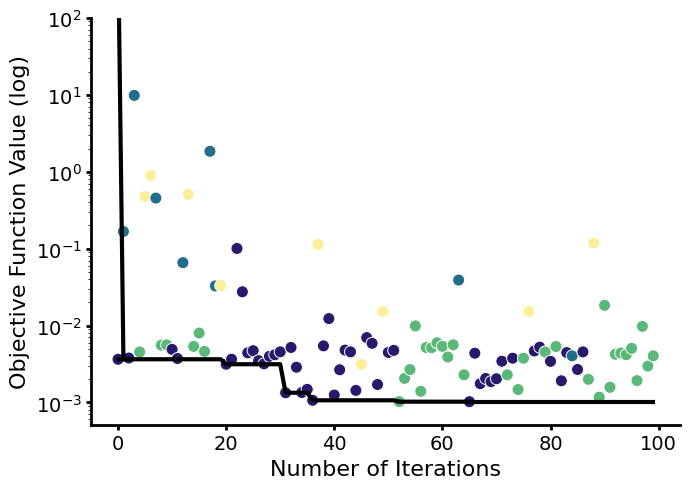

In [12]:
for suffix in ['0_2']:
    colors = cmaps.haline.discrete(4).colors
    palette = {'[[0, 1, 0], [0, 0, 1]]': colors[3], '[[0, 0, 1], [1, 0, 0]]': colors[2], '[[0, 0, 1], [0, 0, 1]]': colors[1], 'Dual Control': colors[0]}

    bo_data = pd.read_csv('F:/bayesopt/bayesopt_'+suffix+'/bo_data_bayesopt_'+suffix+'.csv').reset_index()

    best_loss = 1E5
    best_circuit = 'Initial'
    best_losses = []
    best_losses_circuits = []
    for i in range(len(bo_data)):
        if bo_data.objective[i] < best_loss:
            best_loss = bo_data.objective[i]
            best_circuit = bo_data.arch[i]
        best_losses.append(best_loss)
        best_losses_circuits.append(best_circuit)
    bo_data['best_losses'] = best_losses
    bo_data['best_loss_circuit'] = best_losses_circuits

    fig = plt.figure(figsize=(7*2, 4.22*2))
    palette = cmaps.haline.discrete(4).colors
    linewidth = 3
    axislabelsize=16
    axistickssize=14
    legendsize=12

    fig, ax = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

    ax.set_xlabel('Number of Iterations', fontsize=axislabelsize)
    ax.set_ylabel('Objective Function Value (log)', fontsize=axislabelsize)
    ax.set_yscale('log')
    #ax.set_ylim([10E-2, 10E8])
    sns.scatterplot(x='index', y='objective', hue='arch', data=bo_data, ax=ax, palette=palette, legend=False, s=75)

    prev_c = 'Initial'
    starts = []
    archs = [prev_c]
    for i in range(len(bo_data)):
        c = bo_data.best_loss_circuit[i]
        if c != prev_c: 
            starts.append(i)
            archs.append(c)
            prev_c = c
    starts
    stops = starts[1:]
    stops.append(len(bo_data))

    for start, stop, a in zip(starts, stops, archs[1:]):
        ax.plot(bo_data.index[start:stop+1], bo_data.best_losses[start:stop+1], color='k', linewidth=3)
    ax.plot([0, 1], [10E2, bo_data.best_losses[starts[0]]], color='k', linewidth=3)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(width=2)
    ax.set_ylim([0, 10E1])
    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.tick_params(axis='y', labelsize=axistickssize)
    ax.tick_params(axis='x', labelsize=axistickssize)

    fig.tight_layout()
    fig.savefig('../figs/ga_bayesopt_'+suffix+'.png', dpi=300)